# Data Analysis (Flights)

A real-world dataset containing flights data from the US Department of Transportation is explored in this tutorial.

We start with loading the data.

In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

flights = pd.read_csv('./datasets/flights.csv')

print('The data set contains {} rows and {} columns.'.format(flights.shape[0], flights.shape[1]))

The data set contains 271940 rows and 20 columns.


There seems 271940 flights appeared in the data set. Let us have look at the first rows.

In [20]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


We can take a close look at the columns.

In [21]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Carrier',
       'OriginAirportID', 'OriginAirportName', 'OriginCity', 'OriginState',
       'DestAirportID', 'DestAirportName', 'DestCity', 'DestState',
       'CRSDepTime', 'DepDelay', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'ArrDel15', 'Cancelled'],
      dtype='object')

The data set has $20$ columns:

- Year: Should always be $2013$ for this data set 
- Month: The month of the flight
- DayofMonth: The day of the flight
- DayOfWeek: The week day of the flight
- Carrier: The carrier of the flight
- OriginAirportID: The origin airport id
- OriginAirportName: The origin airport name
- OriginCity: The origin city 
- OriginState: The origin state
- DestAirportID: The destination airport id
- DestAirportName: The destination airport name
- DestCity: The destination city
- DestState: The destination state
- CRSDepTime: The scheduled departure time
- DepDelay: Delay in the departure time (mins)
- DepDel15: Whether the flight is delayed at the departure more than 15 mins (binary)
- CRSArrTime: The scheduled arrival time
- ArrDelay: Delay in the arrival time (mins)
- ArrDel15: Whether the flight is delayed at the arrival more than 15 mins (binary)
- Cancelled: Whether the flight is cancelled (binary)

## Data cleaning

Let us have a look at whether the data set contains any null or missing data. 

In [22]:
flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

It seems that the column `DepDel15` includes $2761$ null values. As this columns is directly computed using `DepDelay` column, it is wise to first check the corresponding lines.

In [23]:
flights[flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

As seen above, they are all $0$ values for the departures. It seems suspicious. They cannot be all zero minutes. Let us have a look at the whole column description.

In [24]:
flights.DepDelay.describe()

count    271940.000000
mean         10.350449
std          35.673710
min         -63.000000
25%          -4.000000
50%          -1.000000
75%           9.000000
max        1425.000000
Name: DepDelay, dtype: float64

The mean value and the median value show us that an average flight is not delayed more than 15 minutes. Thus, we can safely replace null values by $0$.

In [25]:
flights.DepDel15 = flights.DepDel15.fillna(0)

There exists no null values in our data set. Now, we can move on to the exploring the data in detail. We can have a look at the outliars. Recall our columns, it is not wise to check all the columns. Actually, an outlier can exist on only two columns, namely `DepDelay` and `ArrDelay`.

We can execute a function that takes a column as an input and outputs the detailed information regarding the column.

In [26]:
# Function to show summary stats and distribution for a column
def information(column):
    from matplotlib import pyplot as plt

    # Get the description of the column
    min_val = column.min()
    max_val = column.max()
    mean_val = column.mean()
    med_val = column.median()
    mod_val = column.mode()[0]

    print(column.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                                           mean_val,
                                                                                                           med_val,
                                                                                                           mod_val,
                                                                                                           max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(column)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(column, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(column.name)

    # Show the figure
    fig.show()

Now, we are ready to use the function. First, start with departure delays.

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



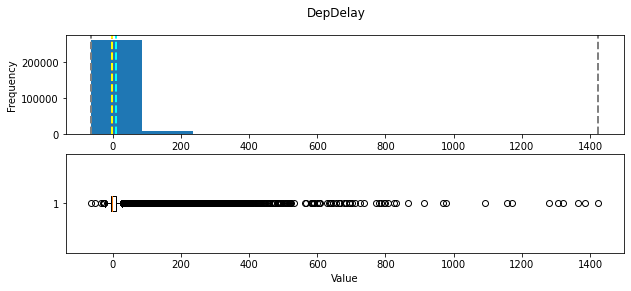

In [27]:
information(flights['DepDelay'])

Second, we can have a look at the details on the arrival delays.

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



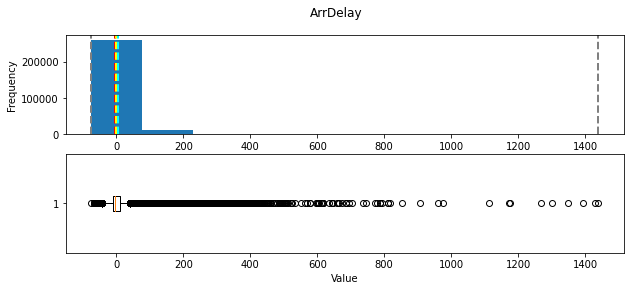

In [28]:
information(flights['ArrDelay'])

In both columns, there exist outliers and we can eliminate them using the percentiles. We can drop the $2\%$ from both sides for each column.

DepDelay 
Minimum:-9.00
Mean:5.47
Median:-1.00
Mode:-3.00
Maximum:83.00

ArrDelay 
Minimum:-28.00
Mean:1.95
Median:-3.00
Mode:0.00
Maximum:124.00



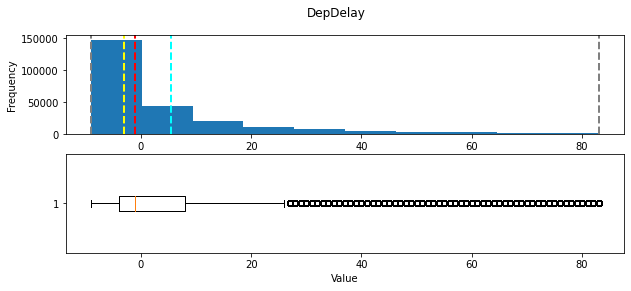

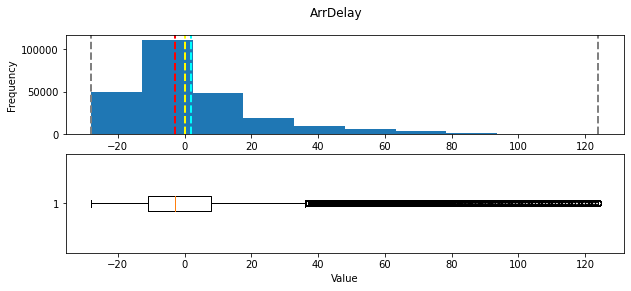

In [29]:
# ArrDelay 2% and 98% percentiles
ArrDelay_02 = flights.ArrDelay.quantile(0.02)
ArrDelay_98 = flights.ArrDelay.quantile(0.98)
flights = flights[flights.ArrDelay < ArrDelay_98]
flights = flights[flights.ArrDelay > ArrDelay_02]

# DepDelay 2% and 98% percentiles
DepDelay_02 = flights.DepDelay.quantile(0.02)
DepDelay_98 = flights.DepDelay.quantile(0.98)
flights = flights[flights.DepDelay < DepDelay_98]
flights = flights[flights.DepDelay > DepDelay_02]

# The revised columns
for column in ['DepDelay','ArrDelay']:
    information(flights[column])

Based on the distribution of the values, it seems that some outliars still exist in the data set. We can use $90\%$ percentile to eliminate those outliars. Note that one should be careful when selecting this value.

DepDelay 
Minimum:-9.00
Mean:0.92
Median:-1.00
Mode:-3.00
Maximum:28.00

ArrDelay 
Minimum:-28.00
Mean:-3.01
Median:-4.00
Mode:0.00
Maximum:44.00



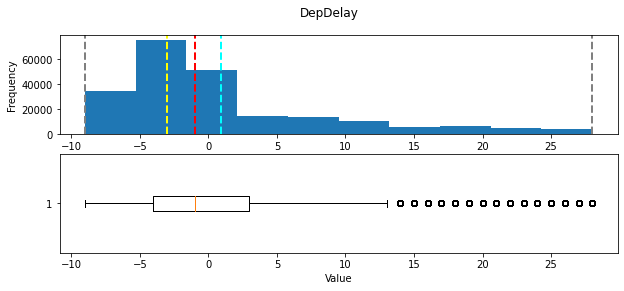

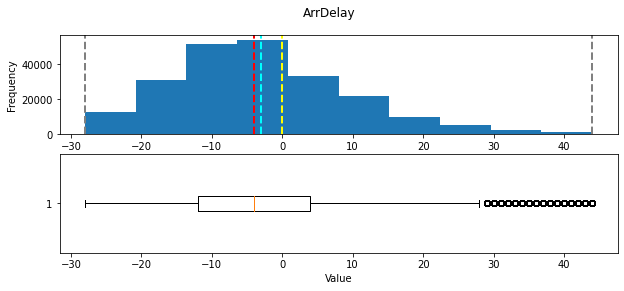

In [30]:
# ArrDelay 95% percentiles
ArrDelay_95 = flights.ArrDelay.quantile(0.95)
flights = flights[flights.ArrDelay < ArrDelay_95]

# DepDelay 95% percentiles
DepDelay_95 = flights.DepDelay.quantile(0.95)
flights = flights[flights.DepDelay < DepDelay_95]

# The revised columns
for column in ['DepDelay','ArrDelay']:
    information(flights[column])

Now, we can see that the columns seems better. However, as can be inspected from the figures, there exist skewness in both columns. 

The mean and median values for departure delays and arrival delays are became:

In [31]:
flights[['DepDelay', 'ArrDelay']].mean()


DepDelay    0.915860
ArrDelay   -3.005793
dtype: float64

In [32]:
flights[['DepDelay', 'ArrDelay']].median()

DepDelay   -1.0
ArrDelay   -4.0
dtype: float64

As seen, the flights are on time in average. 

### Breakdown by Airlines

Let us have a look at the breakdowns of these delays on the airline companies.

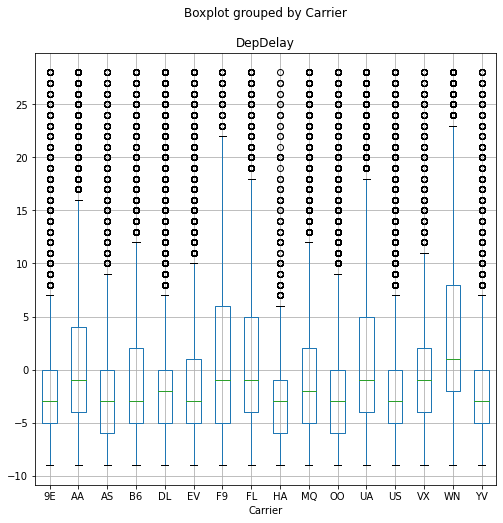

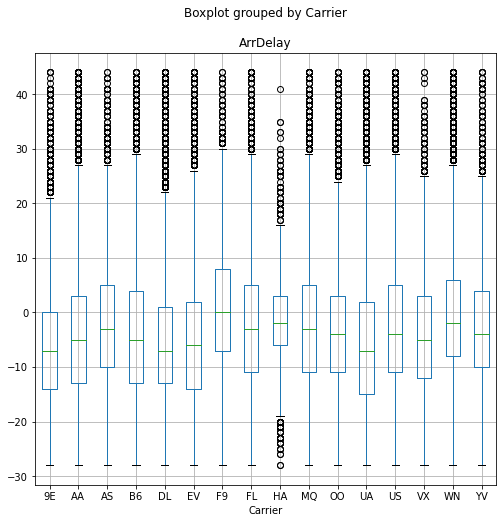

In [33]:
for column in ['DepDelay', 'ArrDelay']:
    flights.boxplot(column=column, by='Carrier', figsize=(8,8))

### Breakdown by Days

Let us have a look at the breakdowns of these delays on the days of the week.

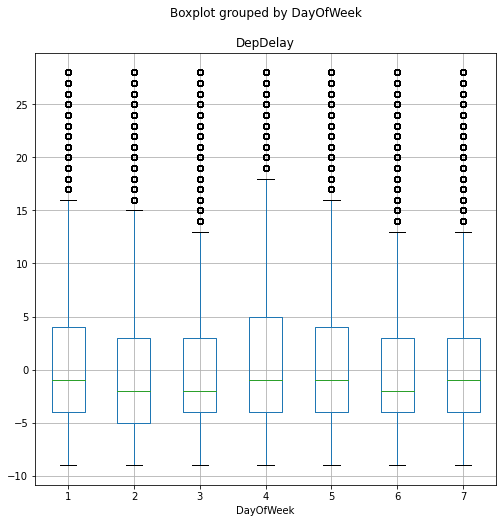

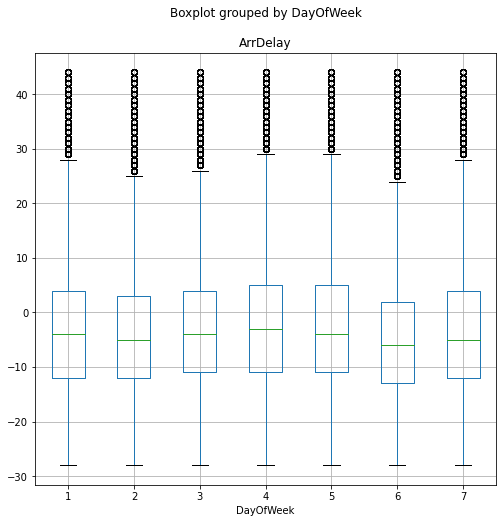

In [34]:
for column in ['DepDelay', 'ArrDelay']:
    flights.boxplot(column=column, by='DayOfWeek', figsize=(8,8))

There seems no significant deviation based on the day of the week.

### Delays per Airport

Let us have a look at the performance of airports on the departures. We first need to group the whole dataframe based on the Origin Airports using `groupby()` function.

,DepDelay
OriginAirportName,
Chicago Midway International,5.169925
Dallas Love Field,4.323754
William P Hobby,3.894565
Baltimore/Washington International Thurgood Marshall,3.049778
Denver International,3.042631
...,...
Cincinnati/Northern Kentucky International,-1.400101
Richmond International,-1.456473
Memphis International,-1.476673


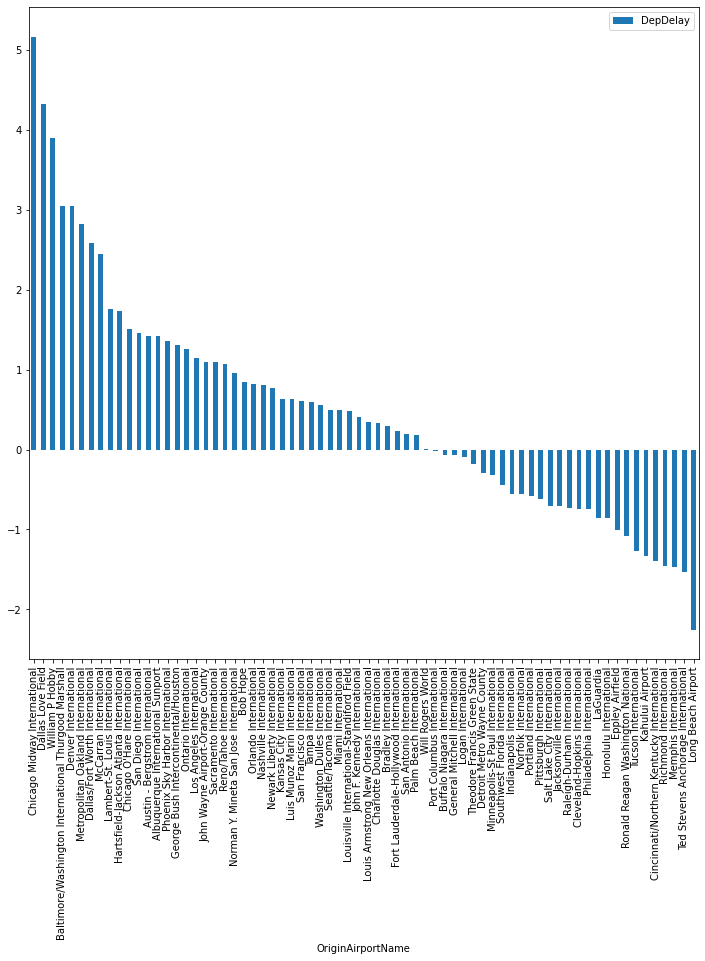

In [35]:
dep_gr_airport = flights.groupby(flights.OriginAirportName)

mean_dep = pd.DataFrame(dep_gr_airport['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_dep.plot(kind = "bar", figsize=(12,12))
mean_dep

Chicago Midway International Airport has the most delayed flights on average. Dallas and William P Hobby Airports are the second and third.